<font size="6">Parameterschätzen Normalverteilung

In [308]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
from ipywidgets import interact
import ipywidgets as widgets
from scipy.special import comb
from scipy.stats import binom
from scipy.special import factorial
from scipy.stats import norm


In [310]:
%%latex
Wir erinnern: Eine Zufallsvariable $X$ heißt Normalverteilt mit Mittelwert $\mu\in \mathbb{R}$ und Varianz $\sigma^2>0$, falls diese über folgende Dichte auf $\mathbb{R}$ verfügt
\[
\mathbb{P}(X\in (a, b))=\int_a^b \frac{1}{2\pi \sigma^2}\exp\left(\frac{(x-\mu)^2}{2\sigma^2}\right)dx
    \]

<IPython.core.display.Latex object>

In [312]:
%%latex
Wir visualisieren die obige Dichte für verschiedene Werte von $\mu$ und $\sigma^2$. 

<IPython.core.display.Latex object>

In [314]:
def normplot(mu, sigma2):
    k=np.arange(-5, 5, 0.01)
    p=norm.pdf(k, loc=mu, scale=np.sqrt(sigma2))
    plt.title(f'Dichte der Normalverteilung (μ = {round(mu, 2)}, σ²={round(sigma2, 2)})')
    plt.xlabel('x')
    plt.ylabel('p(x)')
    plt.plot(k, p)
    plt.ylim(0, 0.5)
    plt.show()
    
slider_mu=widgets.FloatSlider(value=1, min=-5, max=5, description='μ', description_width='auto', orientation='horizontal', layout=widgets.Layout(width='500px'), readout=True)
slider_sig=widgets.FloatSlider(value=1, min=0.3, max=5, description='σ²', description_width='auto', orientation='horizontal', layout=widgets.Layout(width='500px'), readout=True)
interact(normplot, mu=slider_mu, sigma2=slider_sig)

interactive(children=(FloatSlider(value=1.0, description='μ', layout=Layout(width='500px'), max=5.0, min=-5.0)…

<function __main__.normplot(mu, sigma2)>

<font size="5">Szenario 1: Mittelwert bekannt, Varianz unbekannt

In [317]:
%%latex
Wir haben nun Daten gegeben, von denen wir wissen, dass sie normalverteilt sind. Wir kennen außerdem $\mu=0$

<IPython.core.display.Latex object>

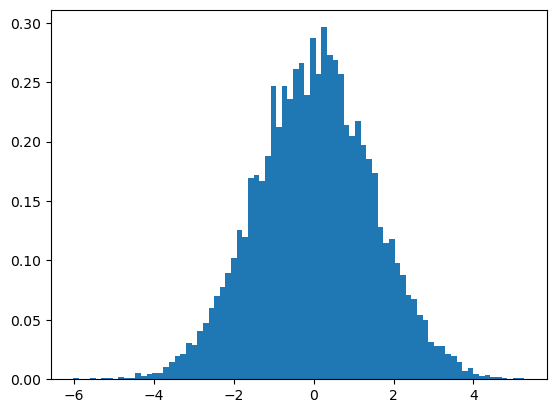

In [321]:
#Referenz für pseudo-Zufallszahl. Kann beliegib geändert werden, um neue Beispiele zu erzeugen.
np.random.seed(421689)
#Nehme (pseudo)-zufallszahl sig2 zwischen 1 und 5
sig2=np.round(np.random.uniform(1, 5), 2)
#Nehme Stichprobe der Länge 'size', welche normalverteilt mit Varianz sig2 ist
sam= np.round(np.random.normal(loc=0, scale=np.sqrt(sig2), size=10000), 2)
plt.hist(sam, bins=80, density=True)
plt.show()

In [323]:
%%latex
Nach Hausaufgabe ist der maximum likelyhood Schätzer gegeben durch 
\[
\hat{\sigma}^2_{ML}=\frac{1}{n}\sum_{k=1}^n(X_i-0)^2
    \]

<IPython.core.display.Latex object>

In [325]:
#In unserem Fall ergibt dies
sig2ML=np.round(np.mean(np.square(sam)), 2)
print(sig2ML)

2.13


In [329]:
def normplotfit(sigma2):
    k=np.arange(-5, 5, 0.01)
    p=norm.pdf(k, loc=0, scale=np.sqrt(sigma2))
    plt.title(f'Dichte der Normalverteilung (μ = 0, σ²={round(sigma2, 2)})')
    plt.xlabel('x')
    plt.ylabel('p(x)')
    plt.plot(k, p)
    plt.ylim(0, 0.5)
    plt.hist(sam, density=True, bins=80)
    plt.show()
slider_sig=widgets.FloatSlider(value=1, min=0.3, max=5, description='σ²', description_width='auto', orientation='horizontal', layout=widgets.Layout(width='500px'), readout=True)
interact(normplotfit, sigma2=slider_sig)

interactive(children=(FloatSlider(value=1.0, description='σ²', layout=Layout(width='500px'), max=5.0, min=0.3)…

<function __main__.normplotfit(sigma2)>

In [350]:
#Tatsächlicher Wert war
print(sig2)

2.14


<font size="5">Szenario 2: Varianz bekannt, Mittelwert unbekannt

In [353]:
%%latex
Wir haben nun Daten gegeben, von denen wir wissen, dass sie normalverteilt sind. Wir kennen außerdem $\sigma^2=1$

<IPython.core.display.Latex object>

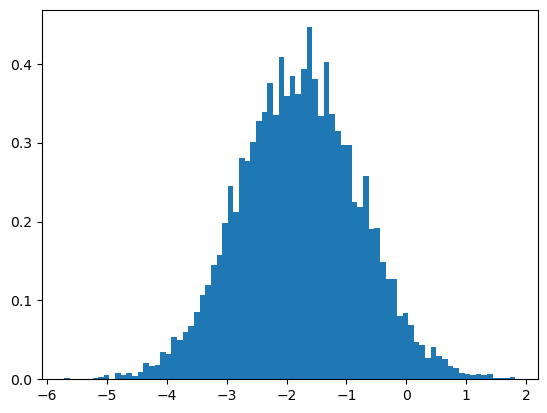

In [363]:
#Referenz für pseudo-Zufallszahl. Kann beliegib geändert werden, um neue Beispiele zu erzeugen.
np.random.seed(42146)
#Nehme (pseudo)-zufallszahl mu zwischen -3 und 3
mu=np.round(np.random.uniform(-3, 3), 2)
#Nehme Stichprobe der Länge 'size', welche normalverteilt mit Varianz sig2 ist
sam2= np.round(np.random.normal(loc=mu, scale=1, size=10000), 2)
plt.hist(sam2, bins=80, density=True)
plt.show()

In [365]:
%%latex
Nach Hausaufgabe ist der maximum likelyhood Schätzer gegeben durch 
\[
\hat{\mu}_{ML}=\frac{1}{n}\sum_{k=1}^nX_i
    \]

<IPython.core.display.Latex object>

In [367]:
#In unserem Fall ergibt dies
muML=np.round(np.mean(sam2), 2)
print(muML)

-1.79


In [369]:
def normplotfit2(mu):
    k=np.arange(-5, 5, 0.01)
    p=norm.pdf(k, loc=mu, scale=1)
    plt.title(f'Dichte der Normalverteilung (μ = {round(mu, 2)}, σ²=1)')
    plt.xlabel('x')
    plt.ylabel('p(x)')
    plt.plot(k, p)
    plt.ylim(0, 0.5)
    plt.hist(sam2, density=True, bins=80)
    plt.show()
slider_mu=widgets.FloatSlider(value=0, min=-5, max=5, description='μ', description_width='auto', orientation='horizontal', layout=widgets.Layout(width='500px'), readout=True)
interact(normplotfit2, mu=slider_mu)

interactive(children=(FloatSlider(value=0.0, description='μ', layout=Layout(width='500px'), max=5.0, min=-5.0)…

<function __main__.normplotfit2(mu)>

In [371]:
#Tatsächlicher Wert war 
print(mu)

-1.8


<font size="5">Szenario 3: Mittelwert unbekannt, Varianz unbekannt

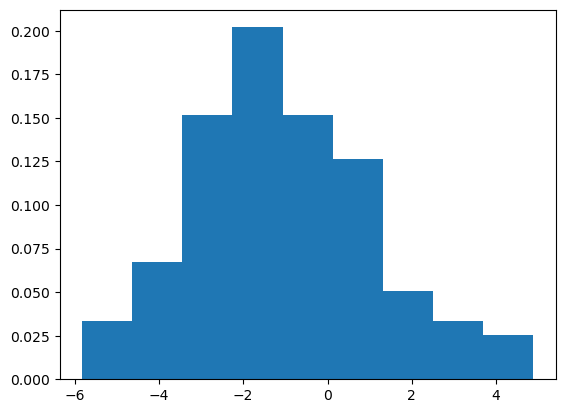

-0.9
4.82


In [855]:
np.random.seed(461)
#Nehme (pseudo)-zufallszahl mu zwischen -3 und 3
mu3=np.round(np.random.uniform(-3, 3), 2)
sig21=np.round(np.random.uniform(1, 5), 2)
#Wieviele Punkte möchten wir samplen?
n=100
bins=int(2*np.cbrt(n))
data= np.random.normal(loc=mu3, scale=np.sqrt(sig21), size=n)
plt.hist(data, bins=bins, density=True)
plt.show()
print(mu3)
print(sig21)

In [857]:
%%latex
Nach Vorlesung sind folgende Größen erwartungstreue Schätzer
\[
\hat{\mu}=\frac{1}{n}\sum_{k=1}^nX_i, \qquad \hat{\sigma}^2=\frac{1}{n-1}\sum_{k=1}^n (X_k-\hat{\mu})^2
    \]

<IPython.core.display.Latex object>

In [859]:
#Berechnung
muhat=np.mean(data)
sigma2hat=np.mean(np.square(data-muhat))*n/(n-1)
print(f'mu={muhat}')
print(f'sigma^2={sigma2hat}')

mu=-1.025429842681323
sigma^2=4.633102108220829


In [861]:
%%latex
Vergleiche dies mit nicht erwartungstreuem Schätzer
\[
\hat{\sigma}_w^2=\frac{1}{n}\sum_{k=1}^n (X_k-\hat{\mu})^2
    \]

<IPython.core.display.Latex object>

In [863]:
#Vergleich nicht nicht erwartungstreuem Schätzer für Varianz
sigma2hatwrong=np.mean(np.square(data-muhat))
print(f'sigma^2_w={sigma2hatwrong}')

sigma^2_w=4.5867710871386205


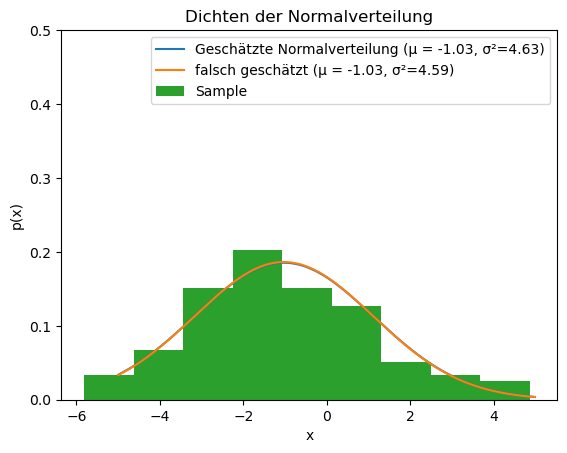

In [877]:
k=np.arange(-5, 5, 0.01)
p=norm.pdf(k, loc=muhat, scale=np.sqrt(sigma2hat))
pwrong=norm.pdf(k, loc=muhat, scale=np.sqrt(sigma2hatwrong))
plt.title(f'Dichten der Normalverteilung')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.plot(k, p, label=f'Geschätzte Normalverteilung (μ = {round(muhat, 2)}, σ²={round(sigma2hat, 2)})')
plt.plot(k, pwrong, label=f'falsch geschätzt (μ = {round(muhat, 2)}, σ²={round(sigma2hatwrong, 2)})')
plt.ylim(0, 0.5)
plt.hist(data, density=True, bins=bins, label='Sample')
plt.legend()
plt.show()

In [879]:
#Tatsächliche Werte
print(mu3)
print(sig21)

-0.9
4.82


<font size="5">Szenario 4: Varianz=Erwartungswert (Aufgabe 1.4)

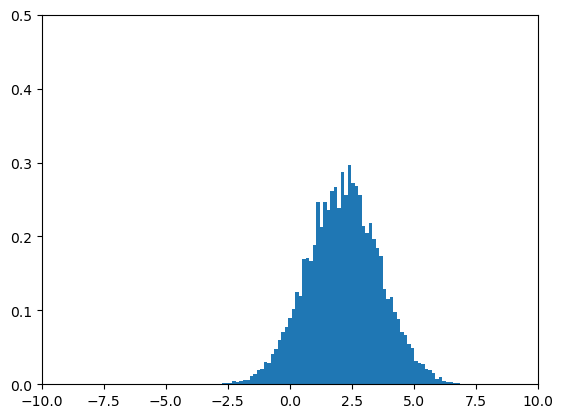

In [908]:
#Referenz für pseudo-Zufallszahl. Kann beliegib geändert werden, um neue Beispiele zu erzeugen.
np.random.seed(421689)
#Nehme (pseudo)-zufallszahl sig2 zwischen 1 und 5
theta=np.round(np.random.uniform(1, 5), 2)
#Nehme Stichprobe der Länge 'size', welche normalverteilt mit Varianz sig2 ist
data_theta= np.round(np.random.normal(loc=theta, scale=np.sqrt(theta), size=10000), 2)
plt.hist(data_theta, bins=80, density=True)
plt.xlim(-10, 10)
plt.ylim(0, 0.5)
plt.show()

In [910]:
def normplotfittheta(theta):
    k=np.arange(-10, 10, 0.01)
    p=norm.pdf(k, loc=theta, scale=np.sqrt(theta))
    plt.title(f'Dichte der Normalverteilung (μ = σ²={round(theta, 2)})')
    plt.xlabel('x')
    plt.ylabel('p(x)')
    plt.plot(k, p)
    plt.ylim(0, 0.5)
    plt.hist(data_theta, density=True, bins=80)
    plt.show()
slider_theta=widgets.FloatSlider(value=1, min=1, max=5, description='μ', description_width='auto', orientation='horizontal', layout=widgets.Layout(width='500px'), readout=True)
interact(normplotfittheta, theta=slider_theta)

interactive(children=(FloatSlider(value=1.0, description='μ', layout=Layout(width='500px'), max=5.0, min=1.0),…

<function __main__.normplotfittheta(theta)>

In [912]:
%%latex
Nach Hausaufgabe ist MLE für den Parameter $\theta$ gegeben durch
\[
\hat{\theta}=-\frac{1}{2}+\sqrt{\frac{1}{4}+\frac{1}{n}\sum_{k=1}^nX_k^2}
    \]

<IPython.core.display.Latex object>

In [914]:
#In unserem Fall
thetahat=-0.5+np.sqrt(0.25+np.mean(np.square(data_theta)))
print(thetahat)

2.152910132288691


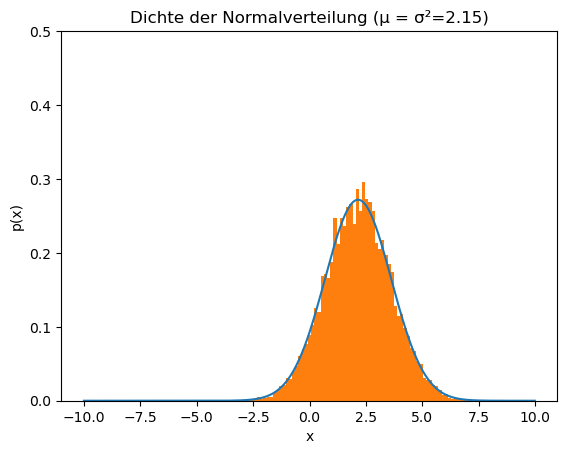

In [902]:
normplotfittheta(thetahat)